# Guía 3: Dataframes en R parte 2
Computación 2, IES.
Profesor: Eduardo Jorquera, eduardo.jorquera@postgrado.uv.cl

## Resumir información

### Nombres de bebés

El primer dataset que exploraremos es el dataset de nombres de bebés, que consiste en el top 1.000 nombres de bebés para niños y niñas en los Estados Unidos, desde 1880 al 2008. Consiste en 258.000 registros (1000 x 2 x 129) con 5 variables: year, name, soundex, sex and prop.

Los datos están aquí: https://ramnathv.github.io/pycon2014-r/explore/data/bnames2.csv.bz2

Impórtelos a R usando:

In [1]:
bnames2 <- read.csv("bnames2.csv.bz2")
head(bnames2)

year,name,prop,sex,soundex
<int>,<fct>,<dbl>,<fct>,<fct>
1880,John,0.081541,boy,J500
1880,William,0.080511,boy,W450
1880,James,0.050057,boy,J520
1880,Charles,0.045167,boy,C642
1880,George,0.043292,boy,G620
1880,Frank,0.027380,boy,F652


Hay muchas preguntas interesantes que podrían plantearse. Empecemos con una sencilla para obtener la popularidad de un nombre específico en el tiempo. Es usual para las personas tratar de rastrear su propio nombre :-)

In [2]:
ed <- subset(bnames2, name == "Eduardo")
head(ed)

,year,name,prop,sex,soundex
,<int>,<fct>,<dbl>,<fct>,<fct>
10638,1890,Eduardo,0.000084,boy,E363
13855,1893,Eduardo,0.000058,boy,E363
14575,1894,Eduardo,0.000104,boy,E363
16921,1896,Eduardo,0.000054,boy,E363
20802,1900,Eduardo,0.000068,boy,E363
21693,1901,Eduardo,0.000087,boy,E363


Es una sorpresa que mi nombre se encuentre allí. Exploremos visualmente estos datos filtrados usando la librería ggplot2 (muy famosa, por cierto). Tómalo como una pequeña introducción a este paquete, quién sabe, quizás podría servirte para cuando hagas tu tesis.

El siguiente codigo se explica por sí mismo; usamos la función `qplot`, que es para un **q**uickplot; y dibujando una línea sobre el tiempo (year) vs prop.

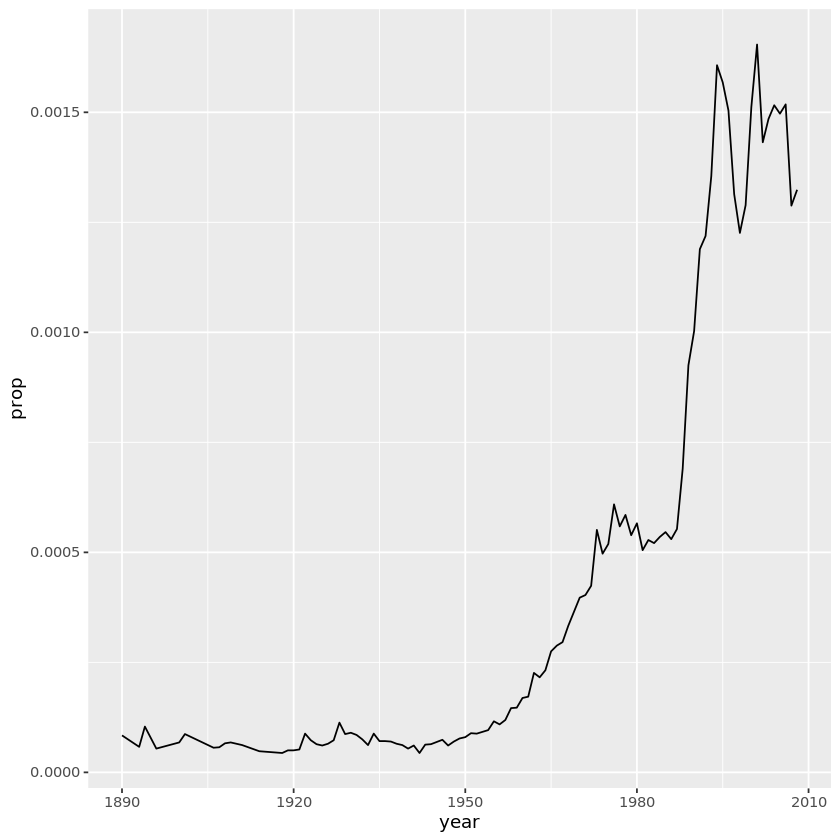

In [3]:
library(ggplot2)
qplot(x = year, y = prop, data = ed, geom = 'line')

#### Ejercicio

Intenta con tu nombre!

Tomemos otro nombre al azar, por ejemplo, "Michelle":

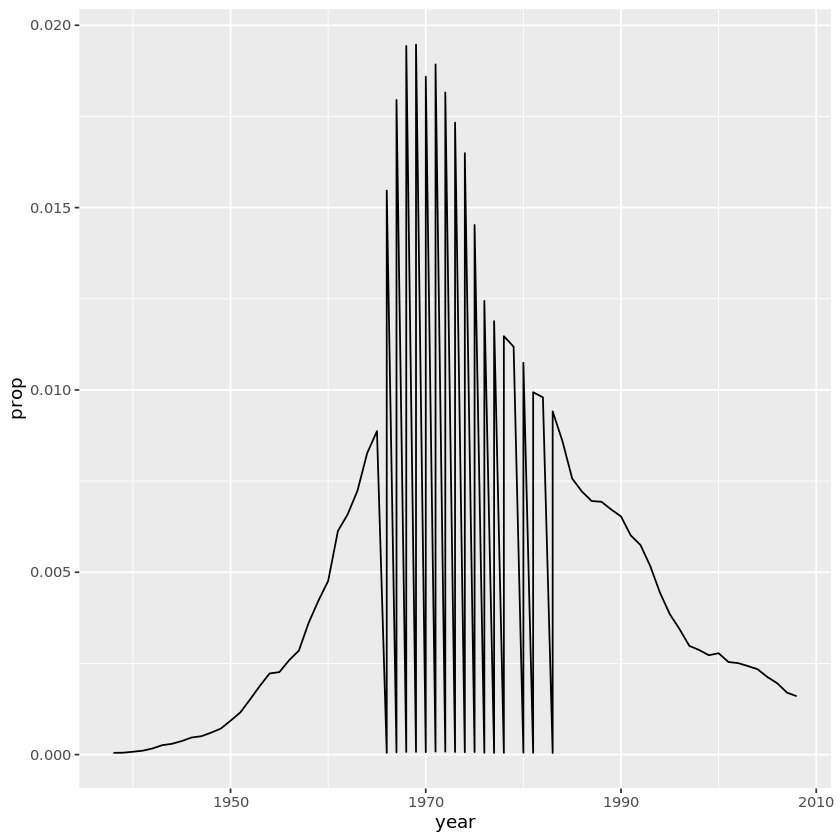

In [4]:
michelle <- subset(bnames2, name == "Michelle")
qplot(x = year, y = prop, data = michelle, geom = 'line')

Esto se ve sucio, ¿por qué razón podría ser?

Grafiquemos los mismos datos usando `point` en lugar de `line`.

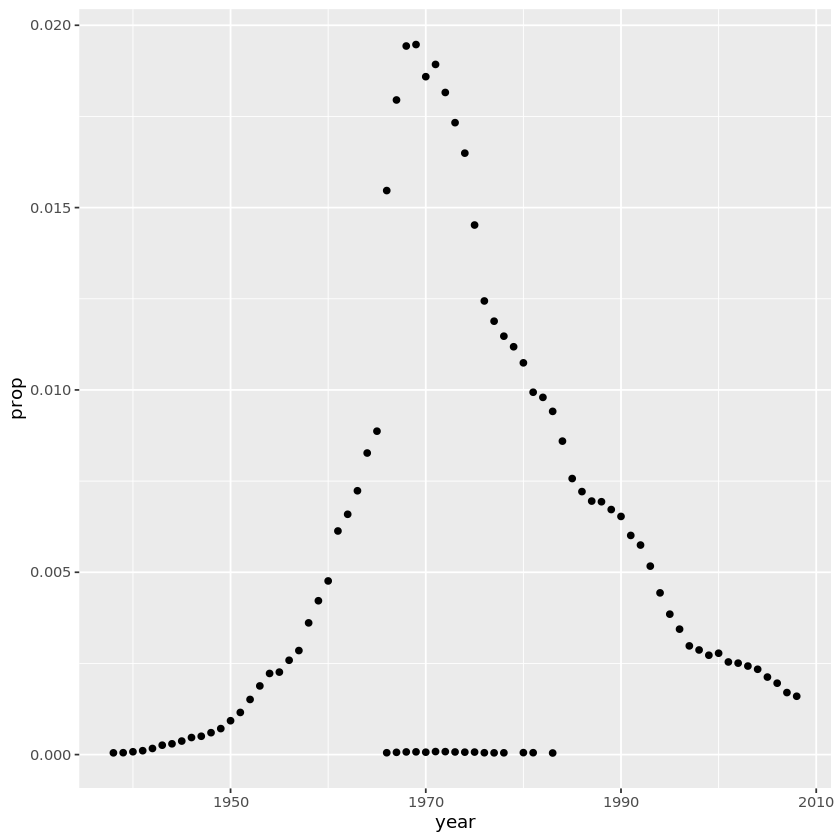

In [5]:
qplot(x = year, y = prop, data = michelle, geom = 'point')

Parecen haber dos agrupaciones de datos. Esto no debería sorprender sabiendo que el nombre Michelle es usado para niños y niñas (al menos en Estados Unidos). En ese caso, podemos indicarle a ggplot que haga el gráfico de línea por sexo (sex):

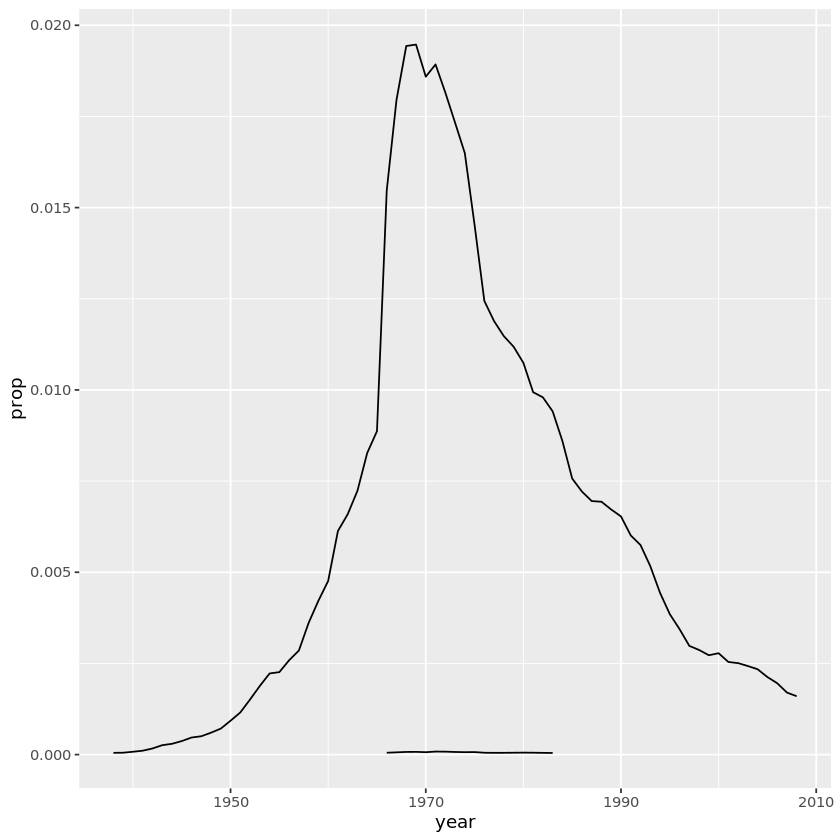

In [6]:
qplot(x = year, y = prop, data = michelle, geom = 'line', group = sex)

Nota que también podríamos decirle a `qplot` el color de las líneas basadas en `sex`, usando `color=sex` al usar la función. No tenemos que usar el argumento `group`, ya que `qplot` lo hará automáticamente para nosotros.

### Ejercicio 1

Repita el mismo ejercicio que hicimos para `name` con la variable `soundex`. En otras palabras, use la variable `soundex` para extraer todos los nombres que suenan como el tuyo y su gráfico de popularidad a través del tiempo. Asegúrate de estar seguro del `geom` que usarás.

In [7]:
#solucion1
greg_soundex = greg$soundex[1]
greg_like <- subset(bnames2, soundex == greg_soundex)
qplot(x = year, y = prop, data = greg_like, geom = 'point')

ERROR: Error in eval(expr, envir, enclos): objeto 'greg' no encontrado


Si tuviéramos que hallar la popularidad de un específico `soundex`, necesitamos resumir (`summarize`) los datos agregando los valores de prop para todos los nombres con el mismo soundex. Una vez más, mientras que la base de R tiene todas las herramientas para cumplir esto directamente, el paquete `plyr` también podrá ser de gran utilidad, ya que tiene muchos "verbos" para manipular los datos.

### Verbos de manipulación de datos

Es bueno pensar en la manipulación de datos en términos de verbos. Hay algunos verbos básicos:

* `subset`
* `mutate`
* `arrange`
* `summarize`
* `join`

Otro verbo importante que es usando en conjunto con los 5 anteriores, es `group`. Veremos como usarlos a lo largo de la guía.

## Nacimientos

Suponga que queremos explorar las tendencias sobre el total de gente con un nombre en específico a lo largo de los años. El dataset de nombres sólo tiene las proporciones. Afortunadamente, el dataset de nacimientos (https://ramnathv.github.io/pycon2014-r/explore/data/births.csv) tiene el número total de nacimientos, con sexo y año:

year,sex,births
<int>,<fct>,<int>
1880,boy,118405
1881,boy,108290
1882,boy,122034
1883,boy,112487
1884,boy,122745
1885,boy,115948


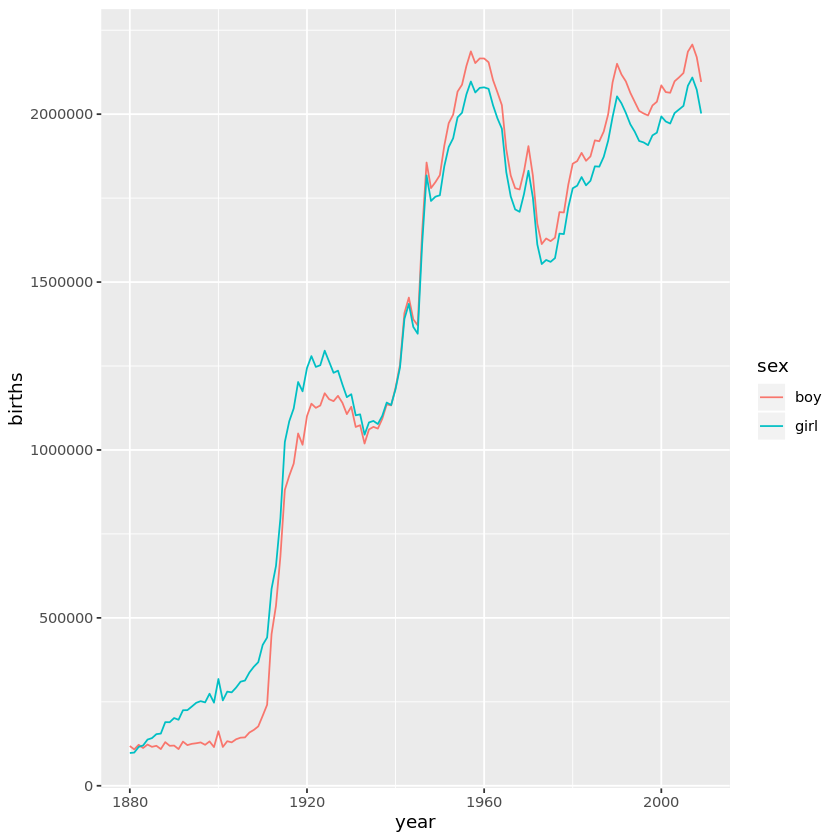

In [8]:
births <- read.csv("births.csv")
head(births)
qplot(year, births, data = births, color = sex, geom = 'line')

#### Pregunta:
¿Por qué los peacks?

### Join

Volviendo a la pregunta  hecha anteriormente, necesitamos "unir" los datos de nacimientos con el dataset de nombres. Existe la función `merge` en R, pero usemos `join` de `plyr`:

In [9]:
library(plyr)
bnames2_b <- join(bnames2, births, by = c("sex", "year"))
head(bnames2_b)

year,name,prop,sex,soundex,births
<int>,<fct>,<dbl>,<fct>,<fct>,<int>
1880,John,0.081541,boy,J500,118405
1880,William,0.080511,boy,W450,118405
1880,James,0.050057,boy,J520,118405
1880,Charles,0.045167,boy,C642,118405
1880,George,0.043292,boy,G620,118405
1880,Frank,0.027380,boy,F652,118405


Hay muchísimas formas de "unir" (`join`) los datos, especialmente manejando las filas/columnas que no están presentes en los dos datasets que son unidos (merged). Aquí hay un grupo de diagramas de Venn para ilustrar las posibilidades. La función `join` puede hacer la mayoría usando los argumentos `type` y `match`. También puedes leer la documentación con `?join` para tener más detalles.

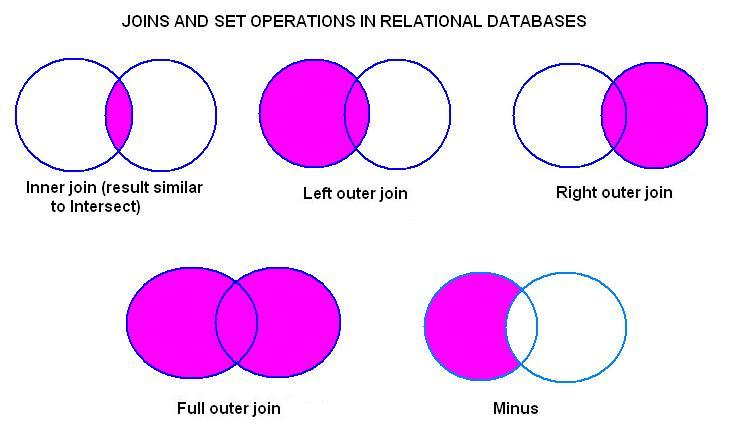

Ahora tenemos todos los datos requeridos para hacer ele ejercicio de exploración, empecemos con

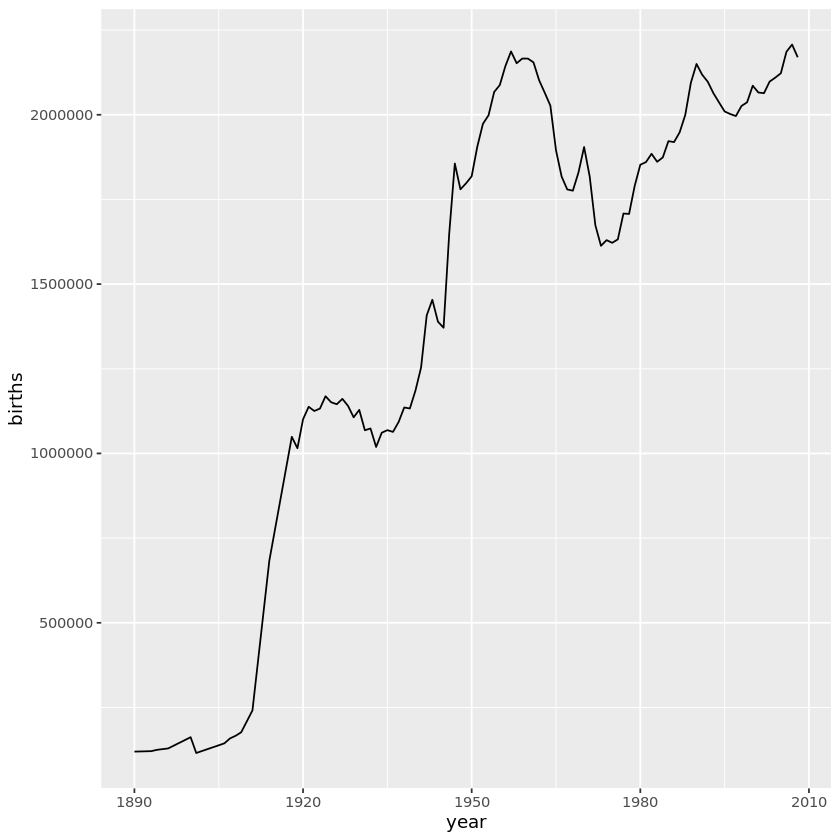

In [10]:
ed <- subset(bnames2_b, name == 'Eduardo')
ed <- mutate(ed, tot = prop * births)
qplot(year, births, data = ed, geom = 'line')

Vaya vaya, esto se ve mucho mejor, mi nombre está teniendo una mayor tendencia. Explóralo con tu nombre:

### Ejercicio 2

¿Cuál es el nombre más popular entre los años 1880 - 2008? ¿Cómo saberlo?

In [11]:
#solucion2
ed_tot <- summarize(ed, tot = sum(prop * births))
head(ed_tot)

tot
<dbl>
85357.65


¿Cómo lo hacemos para todos los nombres?
1. **Separar** el dataset por nombre
2. **Aplicar** el estadístico de resumen para todos los nombres.
3. **Combinar** los estadísticos de resumen creados en un solo dataset.

Implementemos esto en código:

In [12]:
# Separa
pieces <- split(bnames2_b, bnames2_b$name)

# Aplica
results <- vector("list", length(pieces))
for (i in seq_along(pieces)){
  results[[i]] <- summarize(pieces[[i]],
     name = name[1],
     tot = sum(prop * births)
  )
}

# Combina
result <- do.call("rbind", results)
head(result)

name,tot
<fct>,<dbl>
Aaden,959.02508
Aaliyah,39666.73984
Aarav,219.14374
Aaron,509463.85195
Ab,25.04078
Abagail,2684.14044


Para responder la pregunta, debemos ordenar los datos de `tot` en orden descendente:

In [13]:
most_pop_name <- arrange(result, desc(tot))[1,"name"]
most_pop_name

[1] James
6782 Levels: Aaden Aaliyah Aarav Aaron Ab Abagail Abb Abbey Abbie ... Zula

### Ejercicio 3

Suponga que queremos encontrar el `soundex` más popular a lo largo de los años. Mira a lo largo del código que hemos usado y ve qué líneas necesitas cambiar. Ejecuta el código si tienes el tiempo.

El patrón **Separa-Aplica-Combina** es frecuentemente usado en los problemas de análisis de datos.

## Separa-aplica-combina

R tiene muchas funciones que permiten hacer esto fácilmente. Empecemos por revisar el último ejercicio de la parte 2. Ahora, usaremos la función `aggregate` que será bastante útil. Usemos la interfaz que provee esta función.

In [15]:
bnames2_b = mutate(bnames2_b, tot = prop * births)
result <- aggregate(formula = tot ~ name, data = bnames2_b, FUN = sum)
head(result)

name,tot
<fct>,<dbl>
Aaden,959.02508
Aaliyah,39666.73984
Aarav,219.14374
Aaron,509463.85195
Ab,25.04078
Abagail,2684.14044


### Ejercicio 4

¿Cuál es el nombre más popular por sexo durante los años 2000 y 2008?
Pista: la función `aggregate` acepta un `subset` como argumento.

In [19]:
#sol4
result2 <- aggregate(formula = tot ~ name + sex, data = bnames2_b, FUN = sum, 
    subset = (year >= 2000))
most_pop_boy <- arrange(subset(result2, sex == "boy"), desc(tot))[1, "name"]
head(most_pop_boy)
most_pop_girl <- arrange(subset(result2, sex == "girl"), desc(tot))[1, "name"]
head(most_pop_girl)

[1] Jacob
6782 Levels: Aaden Aaliyah Aarav Aaron Ab Abagail Abb Abbey Abbie ... Zula

[1] Emily
6782 Levels: Aaden Aaliyah Aarav Aaron Ab Abagail Abb Abbey Abbie ... Zula

Aquí algunos ejemplos de cuándo sirve el principio de Separa-aplica-combina. De cualquier manera, también puedes pensar en algunos ejemplos.
1. Extraer componentes por nombre desde una lista.
2. Calcula la media para filas/columnas de una matriz.
3. Aplica una función a múltiples conjuntos de argumentos.

R tiene una familia de funciones, popularmente referida como la familia `apply` para tratar ese tipo de operaciones.

## `apply`

Aplica una función para cada fila o columna de una matriz:

In [26]:
m <- matrix(c(1:10, 11:20), nrow = 10, ncol = 2)
# 1 es el indicador de la fila, 2 es el indicador de columna.
apply(m, 1, sum)

[1] 12 14 16 18 20 22 24 26 28 30

In [27]:
apply(m, 2, sum)

[1]  55 155

In [28]:
apply(m, 1, mean)

[1]  6  7  8  9 10 11 12 13 14 15

In [29]:
apply(m, 2, mean)

[1]  5.5 15.5

## `lapply`
Aplica una función a cada elemento de una lista:

In [30]:
lista <- list(a = 1:10, b = 2:20)
lapply(lista, mean)

$a
[1] 5.5

$b
[1] 11

## `sapply`

Es una versión más amigable de `lapply` y retornará los resultados en forma numérica. Trabajemos con lo que ya hemos creado:

In [33]:
lista

$a
 [1]  1  2  3  4  5  6  7  8  9 10

$b
 [1]  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20

In [34]:
x <- sapply(lista, mean)
x

a    b 
 5.5 11.0

In [37]:
class(x)

[1] "numeric"

## `mapply`

Es una versión multivariada de `sapply`. Aplica una función a todos los elementos correspondientes de cada argumento.

In [38]:
list_1 <- list(a = c(1:10), b = c(11:20))
list_1

$a
 [1]  1  2  3  4  5  6  7  8  9 10

$b
 [1] 11 12 13 14 15 16 17 18 19 20

In [39]:
list_2 <- list(c = c(21:30), d = c(31:40))
list_2

$c
 [1] 21 22 23 24 25 26 27 28 29 30

$d
 [1] 31 32 33 34 35 36 37 38 39 40

In [40]:
mapply(sum, list_1$a, list_1$b, list_2$c, list_2$d)

[1]  64  68  72  76  80  84  88  92  96 100

## `tapply`

Aplica una función a subconjuntos de un vector.

In [41]:
head(warpbreaks)

breaks,wool,tension
<dbl>,<fct>,<fct>
26,A,L
30,A,L
54,A,L
25,A,L
70,A,L
52,A,L


In [42]:
with(warpbreaks, tapply(breaks, list(wool, tension), mean))

,L,M,H
A,44.55556,24.00000,24.55556
B,28.22222,28.77778,18.77778


## `by`

Aplica una función de subconjuntos a un dataframe.

In [43]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [44]:
by(iris[, 1:2], iris[, "Species"], summary)

iris[, "Species"]: setosa
  Sepal.Length    Sepal.Width   
 Min.   :4.300   Min.   :2.300  
 1st Qu.:4.800   1st Qu.:3.200  
 Median :5.000   Median :3.400  
 Mean   :5.006   Mean   :3.428  
 3rd Qu.:5.200   3rd Qu.:3.675  
 Max.   :5.800   Max.   :4.400  
------------------------------------------------------------ 
iris[, "Species"]: versicolor
  Sepal.Length    Sepal.Width   
 Min.   :4.900   Min.   :2.000  
 1st Qu.:5.600   1st Qu.:2.525  
 Median :5.900   Median :2.800  
 Mean   :5.936   Mean   :2.770  
 3rd Qu.:6.300   3rd Qu.:3.000  
 Max.   :7.000   Max.   :3.400  
------------------------------------------------------------ 
iris[, "Species"]: virginica
  Sepal.Length    Sepal.Width   
 Min.   :4.900   Min.   :2.200  
 1st Qu.:6.225   1st Qu.:2.800  
 Median :6.500   Median :3.000  
 Mean   :6.588   Mean   :2.974  
 3rd Qu.:6.900   3rd Qu.:3.175  
 Max.   :7.900   Max.   :3.800  

In [45]:
by(iris[, 1:2], iris[, "Species"], sum)

iris[, "Species"]: setosa
[1] 421.7
------------------------------------------------------------ 
iris[, "Species"]: versicolor
[1] 435.3
------------------------------------------------------------ 
iris[, "Species"]: virginica
[1] 478.1

## `replicate`

Una función externa útil para generar datasets para propósitos de simulación. El último argumento indicará si el resultado será un vector o una matrix si es posible.

In [49]:
replicate(10, rnorm(10))

-1.56310809,0.66061968,1.92583030,-1.23262714,-1.7088717,-1.44376143,0.7679854,-0.460740502,-0.43488248,-0.003814418
1.54687522,-0.10777592,-0.17697353,-0.83377512,-1.1101590,1.24044863,1.8280274,-0.632348019,0.04645366,-0.850923343
-0.07750122,-0.04666334,-0.23229028,-0.04904784,-0.7547804,-0.79281134,-0.1111826,0.321933111,-1.90976403,1.277777600
0.73740501,0.97207216,-0.02718855,0.15084913,0.2371338,-2.34342646,0.6676098,-0.769793774,-1.14148371,-0.814773303
1.72148144,-1.17029296,-0.98847184,0.96207915,-1.2532613,-0.25622784,1.1566751,0.633072752,0.42412496,0.531554274
0.54993267,-0.24498409,-0.74563261,-0.77128495,-0.7939975,0.44452759,-2.2690083,-0.549576264,0.42995560,0.311946985
-0.81203064,-1.13706150,0.06158411,0.19349608,-0.7769916,0.04120428,0.4212559,-1.268855073,-2.47830655,1.044469348
-1.83670912,-0.90243545,0.40310877,0.14810246,-0.6592419,-0.96743775,-1.2915451,1.167109135,-0.24071646,1.993523578
-0.18101326,-1.46005318,0.24030255,-0.71722902,0.3132552,-1.25360891,-1.4181132,-0.451630740,-1.49289338,-0.918119643
1.59065982,0.70034376,-0.39191258,-0.12401976,1.1171041,-0.49036993,1.1683362,0.001286637,-1.22879309,0.700476245


In [51]:
replicate(10, rnorm(10), simplify = TRUE)

0.92399994,-0.67971873,0.8702119,-0.532200591,0.5602041,-1.9762563,-0.35916456,0.2732087,1.42678576,-0.4272628
1.04442966,0.02762431,-0.1664771,0.077214620,1.2874693,-0.5267711,-1.37895134,-1.1366119,-1.00846862,1.0173201
0.40769943,1.27689365,0.8306616,-1.333259785,0.7991624,1.9872479,-0.50810451,1.5761744,-2.16099229,-1.0174322
0.08921949,0.53495597,-1.1048644,0.005083713,0.2769711,-1.3428555,0.67283377,0.6946513,0.32965300,-0.2056561
-0.04907912,0.26869513,0.3672154,-0.047838922,0.2808220,-1.0262139,-0.29898440,0.7142637,-0.93719730,-1.2884850
-0.01867907,-0.31292831,-0.7014462,0.259053148,0.5455482,-0.2353545,1.50065506,0.0664236,0.04556246,1.2450718
-0.51742060,0.95042694,-0.3752721,1.094764847,0.3256024,1.2562686,-0.19324657,1.2112043,1.02070801,-0.7698143
0.19641098,0.07491196,0.4699354,-0.642203866,1.0002517,0.5791370,-0.38066959,0.8234089,2.64586287,0.5041899
0.09074023,-0.20280994,1.1965603,0.066180887,-1.9158404,-0.6870150,-0.05228709,1.9899180,1.52836173,1.1127876
-0.66313101,-0.47104930,0.8859886,-0.229369475,-0.7862907,-2.8743617,0.96966642,1.0852499,-0.58527575,0.2738419


Las funciones que vienen con la base de R funcionan bastante bien, pero existe una inconsistencia de sintaxis que aqueja a muchos de los usuarios. A lo largo de los años, hay muchas alternativas que han emergido para operacionalizar el serparar-aplicar-combinar. Ahora exploraremos algunos paquetes.

Recuerda que los principios de separar-aplicar-combinar se puede desmenuzar como:

1. **Separar** el dataset por nombre
2. **Aplicar** el estadístico de resumen para todos los nombres.
3. **Combinar** los estadísticos de resumen creados en un solo dataset.

## `plyr`

El primer paquete es este, la filosofía básica de su funcionamiento es poder hacerse cargo de cualquier operación de separar-aplicar-combinar, el usuario sólo necesita especificar los siguientes detalles:

1. La estructura de datos en el input.
2. El dataset del que se trabajará.
3. La variable en la que se necesita separar el dataset.
4. La función para aplicar a cualquier "trozo" separado.
5. La estructura de dato que será el output para combinar las piezas.

Acorde al paquete, `plyr` sintetiza toda la familia `apply` en una consistente matriz de funciones, la cual es muy útil:

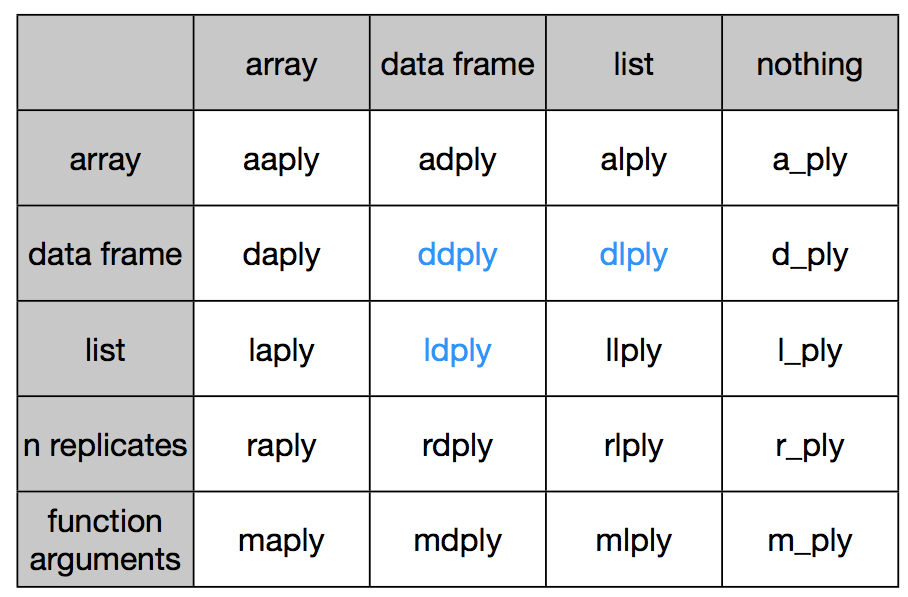

Volvamos a nuestro problema anterior, el de obtener por sexo el nombre más popular entre los años 2000 y 2008. Le pasamos como input un dataframe, y como output también queremos un dataframe. Entonces tomamos la función `ddply`, donde la primera `d` hace referencia al input que es un dataframe, y la segunda `d` hace referencia que el output también es un dataframe.

El resto de los argumentos se ven bastante similares que en la función `aggregate`, ya que fue el primer enfoque de cómo abordar el problem de manera primitiva de R.

In [55]:
library(plyr)
result <- ddply(
  .data = subset(bnames2_b, year >= 2000),
  .variables = c('sex', 'name'),
  .fun = function(p){
    summarize(p, tot = sum(tot))
  }
)
head(result)

sex,name,tot
<fct>,<fct>,<dbl>
boy,Aaden,959.0251
boy,Aarav,219.1437
boy,Aaron,78738.0308
boy,Abdiel,199.6161
boy,Abdullah,1866.2335
boy,Abel,7394.3078


El paquete `plyr` ofrece una sintaxis que permite escribir código en una sintaxis consistente. El código de arriba puede ser reescrito como:

In [56]:
resultB <- ddply(subset(bnames2_b, year >= 2000), 
  .(sex, name), summarize, tot = sum(tot)
)
head(resultB)

sex,name,tot
<fct>,<fct>,<dbl>
boy,Aaden,959.0251
boy,Aarav,219.1437
boy,Aaron,78738.0308
boy,Abdiel,199.6161
boy,Abdullah,1866.2335
boy,Abel,7394.3078


Funciona pasando el argumento `tot = sum(tot)` en la función `summarize`, lo que permite omitir la definición de una función anónima separada.

En adición a la consistencia de sintaxis de `plyr`, el paquete también provee herramientas para correr (y compilar) tu análisis en paralelo (necesitarás tener el paquete `foreach` instalado) y también muestra una barra de progreso. Puedes estudiar la documentación.

Ahora consideremos otro problema interesante, esta vez dese el dataset de baseball. Suponga que queremos hacer un análisis ajustando una regresión lineal de rbi (runs batted in) para cada jugador en su carrera en términos de los años.

In [57]:
head(baseball[,1:16])

,id,year,stint,team,lg,g,ab,r,h,X2b,X3b,hr,rbi,sb,cs,bb
,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
4,ansonca01,1871,1,RC1,,25,120,29,39,11,3,0,16,6,2,2
44,forceda01,1871,1,WS3,,32,162,45,45,9,4,0,29,8,0,4
68,mathebo01,1871,1,FW1,,19,89,15,24,3,1,0,10,2,1,2
99,startjo01,1871,1,NY2,,33,161,35,58,5,1,1,34,4,2,3
102,suttoez01,1871,1,CL1,,29,128,35,45,3,7,3,23,3,1,1
106,whitede01,1871,1,CL1,,29,146,40,47,6,5,1,21,2,2,4


Empecemos escribiendo una función simple que tome un dataframe que consiste en un subset para cada jugador en específico y luego retorne el modelo de regresión lineal:

In [61]:
rbi_vs_year <- function(df){
  df <- mutate(df, year = year - min(year))
  lm(rbi ~ year, data = df)
}

Note que, ya que los objetos del modelo no son dataframes; es apropiado retornar como una lista todo el output (con el tiempo verás que simplifica mucho las cosas). Entonces, usamos la función `dlply`:

In [59]:
models <- dlply(baseball, .(id), rbi_vs_year)
models[[1]]


Call:
lm(formula = rbi ~ year, data = df)

Coefficients:
(Intercept)         year  
    118.924       -1.732  


¿Qué tal si quisiéramos un dataframe de coeficientes? Note que empezamos con un objeto **l**ista de objetos del modelo y queremos un **d**ataframe como output.

id,(Intercept),year
<chr>,<dbl>,<dbl>
aaronha01,118.9239130,-1.732213439
abernte02,0.5540096,-0.002403238
adairje01,18.8310345,0.879310345
adamsba01,4.2961936,-0.033643039
adamsbo03,32.0000000,-1.770000000
adcocjo01,65.4509804,0.068627451


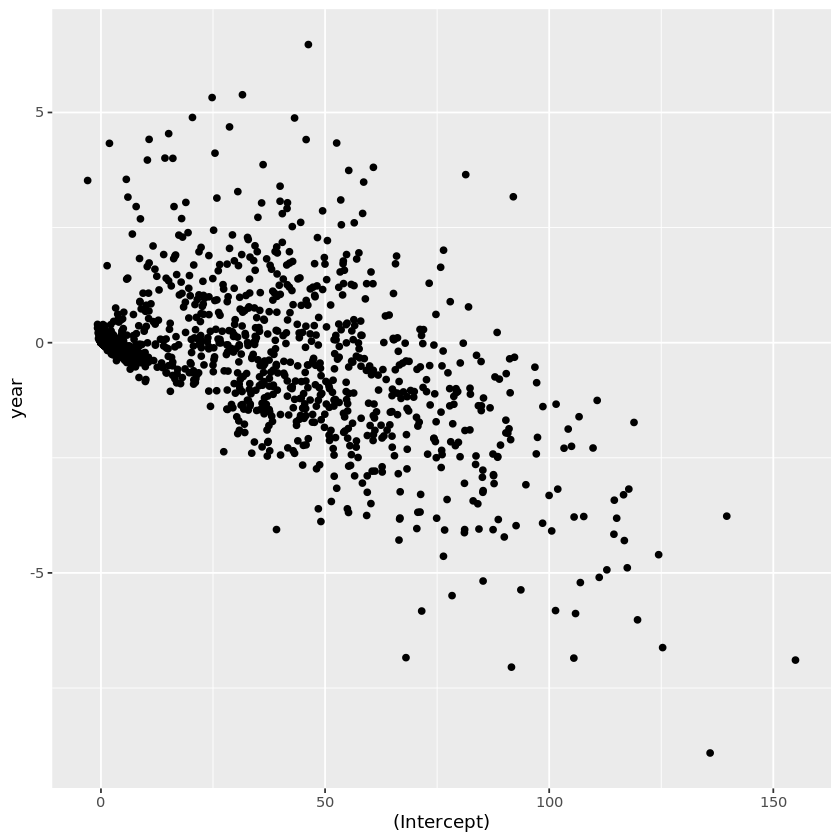

In [62]:
coefs <- ldply(models, coef)
head(coefs)
qplot(`(Intercept)`, year, data = coefs)

El paquete `plyr` es mucho más que esto, te invito a explorarlo para lograr ver su real alcance. Por otro lado, la computación de todos sus algoritmos puede ser lenta para grandes volúmenes de datos. En tales situaciones, tienes la opción de usar otros dos paquetes de R: `dplyr` y `data.table`.

## `dplyr`

El paquete `dplyr` es una implementación de la siguiente generación de `plyr`. Acorde a su autor, Hadley Wickham,
    *dplyr es un nuevo paquete que provee un conjunto de herramientas para manipular datasets de R de manera eficiente. dplyr es la siguiente iteración de plyr, enfoncándose en sólo dataframes. splyr es más rápido y tiene una API (interfaz de programación) más consistente*.

Algunas características de este paquete son:

1. Velocidad: Todas las manipulaciones tienen a C++ como compilador de fondo (Rcpp).
2. Consistencia: Todos los datos tabulados permiten ser tratados de la misma manera que los dataframes; por ejemplo, bases de datos.
3. Simplicidad.

Tomemos un ejemplo del dataset de *Batting*, de la librería `Lahman`. Estamos interesados en calcular el número total de juegos jugados por cada jugador, ordenados en orden decreciente de totales.

En `plyr`, escribiríamos el siguiente código:

In [75]:
library(Lahman)
games <- ddply(Batting, .(playerID), summarize, total = sum(G))
head(arrange(games, desc(total)), 5)

playerID,total
<chr>,<int>
rosepe01,3562
yastrca01,3308
aaronha01,3298
henderi01,3081
cobbty01,3035


El mismo trozo de código puede ser reescrito en `dplyr`, usando su operador de cadena `%>%`

In [76]:
library(dplyr)
games_d <- Batting %>%
  group_by(playerID) %>%
  summarize(total = sum(G)) %>%
  arrange(desc(total)) %>%
  head(5)
games_d

playerID,total
<chr>,<int>
rosepe01,3562
yastrca01,3308
aaronha01,3298
henderi01,3081
cobbty01,3035


Esto debería ser familiar para tí dada tu experticia usando pandas.

Si corres ambos códigos, notarás que `dplyr` es mucho más rápido que `plyr`.

## data.table

Ahora usando `data.table`, haremos el mismo ejercicio (nota lo rápido que es al compilar):

In [79]:
library(data.table)
Batting_DT <- data.table(Batting)
games_dt <- Batting_DT[,
  list(total = sum(G)),
  "playerID"
][
  head(order(-total), 5),
]
games_dt

playerID,total
<chr>,<int>
rosepe01,3562
yastrca01,3308
aaronha01,3298
henderi01,3081
cobbty01,3035
